# Support Vector Machine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR

In [2]:
# Globals
ORANGE = '#F2BE4A'
RED = '#ef4123'
GRAY = '#545453'

## SVC

### Prepare Dataset

In [3]:
data = pd.read_csv('./data/penguins_size.csv')

data = data.drop(['sex', 'island', 'flipper_length_mm', 'body_mass_g'], axis=1)
data = data.dropna()
data = data[data['species'] != 'Chinstrap']


X = data.drop(['species'], axis=1)

ss = StandardScaler()
X = ss.fit_transform(X) 

y = data['species']
species = {'Adelie': -1, 'Gentoo': 1}
y = [species[item] for item in y]
y = np.array(y) 

# Remove sample that is too close
X = np.delete(X, 182, axis=0)
y = np.delete(y, 182, axis=0)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

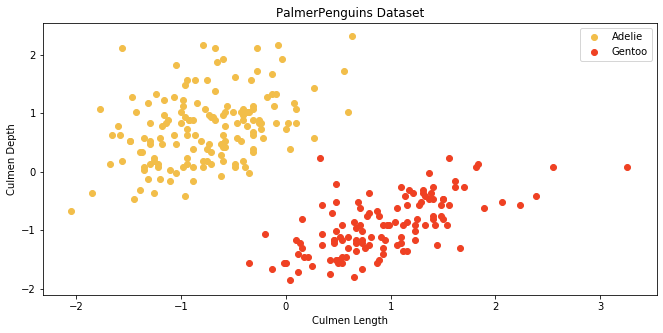

In [5]:
plt.figure(figsize=(11, 5))

plt.title("PalmerPenguins Dataset")
plt.xlabel('Culmen Length')
plt.ylabel('Culmen Depth')

plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color=ORANGE, label='Adelie')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color=RED, label='Gentoo')

plt.legend();

### Python Implementation

In [6]:
class MySVM():
    def __init__(self, number_of_features, learning_rate=0.001):
        self.w = np.zeros(number_of_features + 1)
        self.learning_rate = learning_rate
        pass
    
    def __extend_input(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.concatenate((ones, X), axis=1)
    
    def fit(self, X_train, y_train, epochs):
        X_train = self.__extend_input(X_train)
        
        for epoch in range(1, epochs):
            eta = 1/(self.learning_rate * epoch)
            fac = (1 - (eta * self.learning_rate)) * self.w
            
            for i in range(1, X_train.shape[0]):  
                prediction = np.dot(X_train[i], self.w)

                if (y_train[i] * prediction) < 1 :
                    self.w = fac + eta * y_train[i] * X_train[i]            
                else:
                    self.w = fac

    
    def predict(self, X_test):
        X_test = self.__extend_input(X_test)
        predictions = []
        
        for x in X_test:
            prediction = np.dot(self.w, x)
            prediction = 1 if (prediction > 0) else -1
            predictions.append(prediction)
        return np.array(predictions)

In [7]:
model = MySVM(X_train.shape[1])
model.fit(X_train, y_train, 10000)

In [8]:
predictions = model.predict(X_test)
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.93      1.00      0.97        28
           1       1.00      0.93      0.96        27

    accuracy                           0.96        55
   macro avg       0.97      0.96      0.96        55
weighted avg       0.97      0.96      0.96        55



### Using SciKit Learn

In [9]:
lsvc_model = LinearSVC(C=1, loss="hinge")

lsvc_model.fit(X_train, y_train)

lsvc_predictions = lsvc_model.predict(X_test)
print(metrics.classification_report(y_test, lsvc_predictions))

              precision    recall  f1-score   support

          -1       0.97      1.00      0.98        28
           1       1.00      0.96      0.98        27

    accuracy                           0.98        55
   macro avg       0.98      0.98      0.98        55
weighted avg       0.98      0.98      0.98        55



### Using SciKit Learn Alternative

In [10]:
svc_model = SVC(kernel="linear", C=1)

svc_model.fit(X_train, y_train)

svc_predictions = svc_model.predict(X_test)
print(metrics.classification_report(y_test, svc_predictions))

              precision    recall  f1-score   support

          -1       0.97      1.00      0.98        28
           1       1.00      0.96      0.98        27

    accuracy                           0.98        55
   macro avg       0.98      0.98      0.98        55
weighted avg       0.98      0.98      0.98        55



In [11]:
pd.DataFrame({
    'Actual Value': y_test,
    'My SVM predictions': predictions,
    'LinearSCV predictions': lsvc_predictions,
    'SVC predictions': svc_predictions,
})

,Actual Value,My SVM predictions,LinearSCV predictions,SVC predictions
0,-1,-1,-1,-1
1,1,1,1,1
2,-1,-1,-1,-1
3,1,1,1,1
4,-1,-1,-1,-1
5,1,1,1,1
6,1,1,1,1
7,1,1,1,1
8,1,1,1,1
9,1,-1,1,1


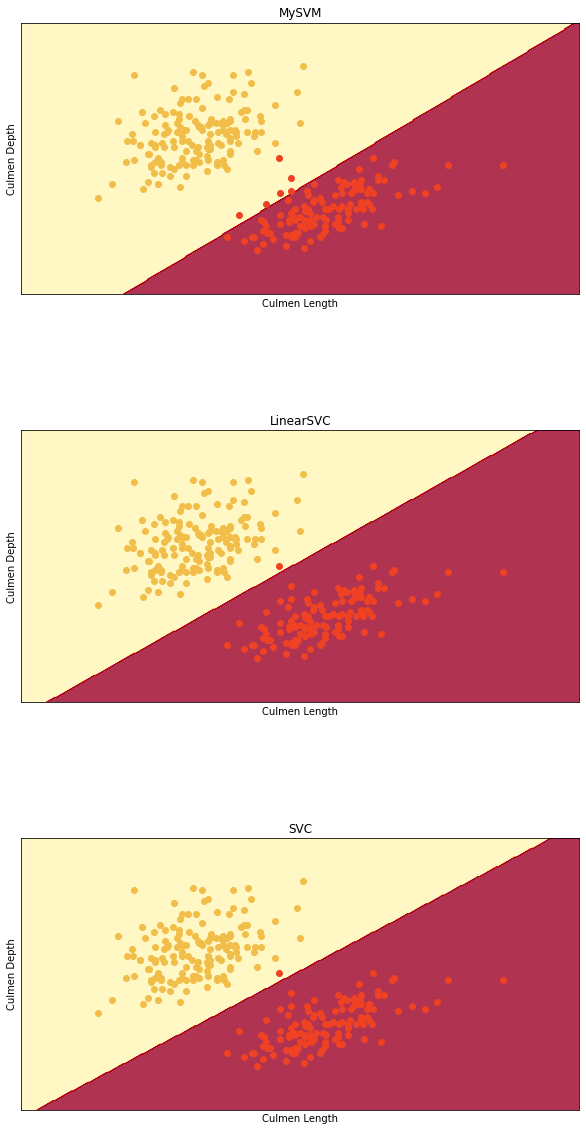

In [12]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['MySVM',
          'LinearSVC',
          'SVC']

plt.figure(figsize=(10, 20))

for i, mdl in enumerate((model, lsvc_model, svc_model)):
    plt.subplot(3, 1, i + 1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    Z = mdl.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='YlOrRd', alpha=0.8)

    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color=ORANGE, label='Adelie')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color=RED, label='Gentoo')
    
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.title(titles[i])
    plt.xlabel('Culmen Length')
    plt.ylabel('Culmen Depth')

plt.show()

### Non - Linear & Kernel Trick

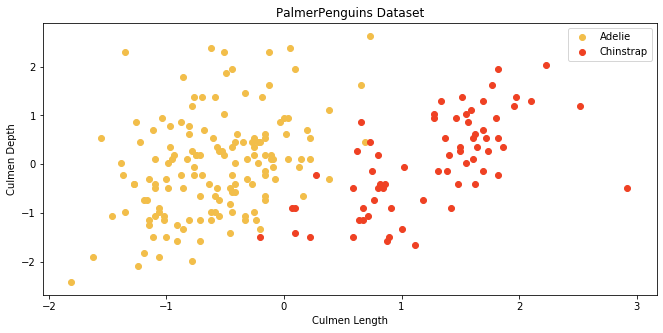

In [13]:
data = pd.read_csv('./data/penguins_size.csv')
data = data.dropna()
data = data.drop(['sex', 'island', 'flipper_length_mm', 'body_mass_g'], axis=1)
data = data[data['species'] != 'Gentoo']

X = data.drop(['species'], axis=1)

ss = StandardScaler()
X = ss.fit_transform(X) 

y = data['species']
species = {'Adelie': -1, 'Chinstrap': 1}
y = [species[item] for item in y]
y = np.array(y) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

plt.figure(figsize=(11, 5))

plt.title('PalmerPenguins Dataset')
plt.xlabel('Culmen Length')
plt.ylabel('Culmen Depth')

plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color=ORANGE, label='Adelie')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color=RED, label='Chinstrap')

plt.legend();

In [14]:
svc_model_poly = SVC(kernel="poly", C=0.6)

svc_model_poly.fit(X_train, y_train)

svc_poly_predictions = svc_model_poly.predict(X_test)
print(metrics.classification_report(y_test, svc_poly_predictions))

              precision    recall  f1-score   support

          -1       0.78      1.00      0.88        25
           1       1.00      0.61      0.76        18

    accuracy                           0.84        43
   macro avg       0.89      0.81      0.82        43
weighted avg       0.87      0.84      0.83        43



In [15]:
svc_model_rbf = SVC(kernel="rbf", gamma=.5, C=0.1)

svc_model_rbf.fit(X_train, y_train)

svc_rbf_predictions = svc_model_rbf.predict(X_test)
print(metrics.classification_report(y_test, svc_rbf_predictions))

              precision    recall  f1-score   support

          -1       0.93      1.00      0.96        25
           1       1.00      0.89      0.94        18

    accuracy                           0.95        43
   macro avg       0.96      0.94      0.95        43
weighted avg       0.96      0.95      0.95        43



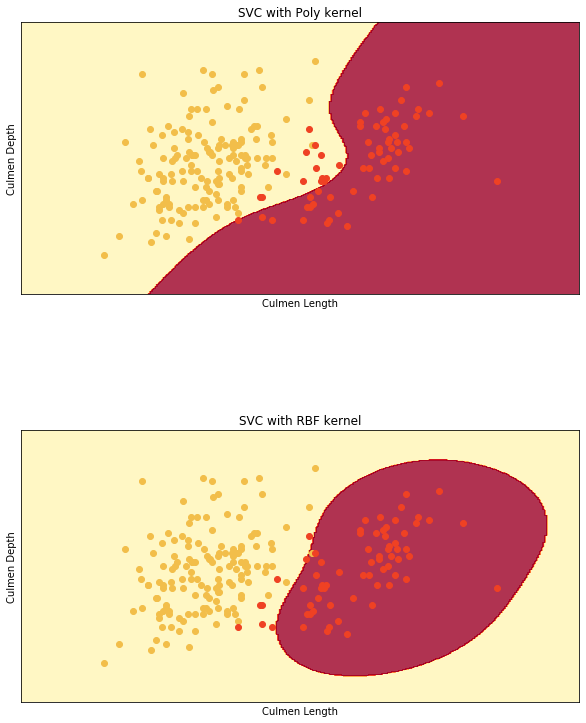

In [16]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVC with Poly kernel',
          'SVC with RBF kernel']

plt.figure(figsize=(10, 20))

for i, mdl in enumerate((svc_model_poly, svc_model_rbf)):
    plt.subplot(3, 1, i + 1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    Z = mdl.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='YlOrRd', alpha=0.8)

    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color=ORANGE, label='Adelie')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color=RED, label='Chinstrap')
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.title(titles[i])
    plt.xlabel('Culmen Length')
    plt.ylabel('Culmen Depth')

plt.show()

## SVR

### Prepare the data

In [17]:
data = pd.read_csv('./data/boston_housing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


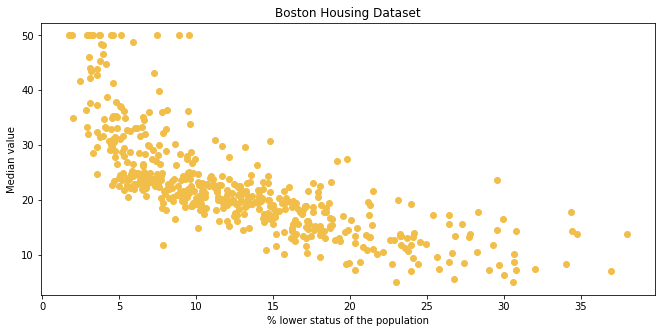

In [18]:
data = data.dropna()

X = data['lstat'].values
X = X.reshape(-1, 1)

y = data['medv'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

plt.figure(figsize=(11, 5))

plt.title("Boston Housing Dataset")
plt.xlabel('% lower status of the population')
plt.ylabel('Median value')

plt.scatter(x = X, y = y, color=ORANGE)
plt.show()

In [19]:
def print_evaluation_metrics(actual_values, predictions):
    print (f'MAE: {metrics.mean_absolute_error(actual_values, predictions)}')
    print (f'MSE: {metrics.mean_squared_error(actual_values, predictions)}')
    print(f'RMSE: {sqrt(metrics.mean_squared_error(actual_values, predictions))}')
    print (f'R Squa: {metrics.r2_score(actual_values, predictions)}')

### Linear SVR

In [20]:
lsvr_model = LinearSVR(epsilon=1.5, max_iter=10000)
lsvr_model.fit(X_train, y_train)

lsvr_predictions = lsvr_model.predict(X_test)

print_evaluation_metrics(y_test, lsvr_predictions)

pd.DataFrame({
    'Actual Value': y_test,
    'LinearSVR prediction': lsvr_predictions,
})

MAE: 4.039760013859003
MSE: 34.6795886877381
RMSE: 5.888937823388705
R Squa: 0.5158812590270303


,Actual Value,LinearSVR prediction
0,20.5,16.767563
1,5.6,10.436848
2,13.4,12.929030
3,12.6,17.834618
4,21.2,22.768851
...,...,...
97,25.0,22.582654
98,19.5,16.244777
99,19.9,17.942039
100,15.4,14.246735


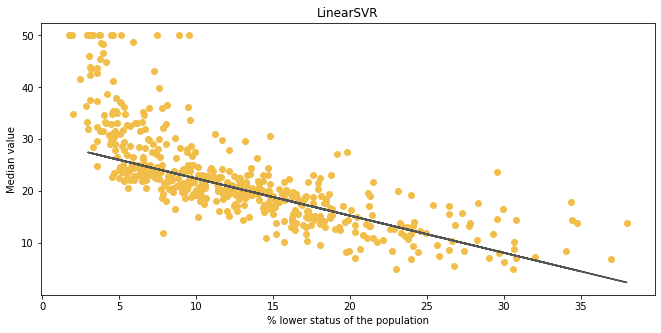

In [21]:
plt.figure(figsize=(11, 5))

plt.title("LinearSVR")
plt.xlabel('% lower status of the population')
plt.ylabel('Median value')

plt.scatter(x = X, y = y, color=ORANGE)
plt.plot(X_test, lsvr_predictions, color=GRAY)
plt.show()

### Polinominal SVR

In [22]:
psvr_model = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
psvr_model.fit(X_train, y_train)

psvr_predictions = psvr_model.predict(X_test)

print_evaluation_metrics(y_test, psvr_predictions)

pd.DataFrame({
    'Actual Value': y_test,
    'LinearSVR Prediction': lsvr_predictions,
    'PolySVR Prediction': psvr_predictions
})

MAE: 4.662371596036839
MSE: 47.64092402894288
RMSE: 6.9022405079034215
R Squa: 0.3349441261442765


,Actual Value,LinearSVR Prediction,PolySVR Prediction
0,20.5,16.767563,17.943993
1,5.6,10.436848,9.078521
2,13.4,12.929030,12.987039
3,12.6,17.834618,19.092961
4,21.2,22.768851,23.110569
...,...,...,...
97,25.0,22.582654,22.997636
98,19.5,16.244777,17.344717
99,19.9,17.942039,19.203110
100,15.4,14.246735,14.833993


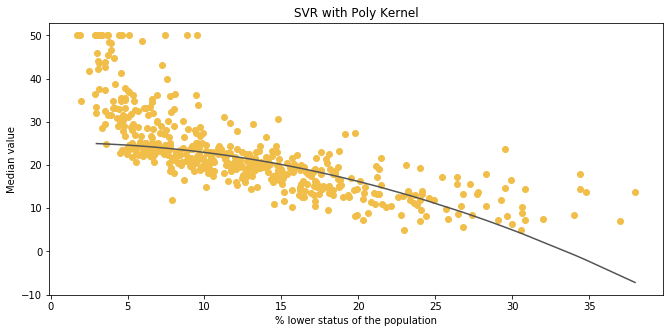

In [23]:
plt.figure(figsize=(11, 5))

plt.title("SVR with Poly Kernel")
plt.xlabel('% lower status of the population')
plt.ylabel('Median value')

plt.scatter(x = X, y = y, color=ORANGE)
values = np.column_stack((X_test, psvr_predictions))
values = values[values[:,0].argsort()]
plt.plot(values[:, 0], values[:, 1], color=GRAY)
plt.show()

### SVR with RBF Kernel

In [24]:
svr_rbf_model = SVR(C=100, gamma=0.1, epsilon=.1)
svr_rbf_model.fit(X_train, y_train)

svr_rbf_predictions = svr_rbf_model.predict(X_test)

print_evaluation_metrics(y_test, svr_rbf_predictions)

pd.DataFrame({
    'Actual Value': y_test,
    'LinearSVR predictions': lsvr_predictions,
    'PolySVR predictions': psvr_predictions,
    'SVR RBF predictions': svr_rbf_predictions
})

MAE: 3.4521634093399776
MSE: 22.03981022950837
RMSE: 4.694657626441823
R Squa: 0.6923295349415319


,Actual Value,LinearSVR predictions,PolySVR predictions,SVR RBF predictions
0,20.5,16.767563,17.943993,15.764753
1,5.6,10.436848,9.078521,13.254520
2,13.4,12.929030,12.987039,12.341407
3,12.6,17.834618,19.092961,16.573468
4,21.2,22.768851,23.110569,22.173334
...,...,...,...,...
97,25.0,22.582654,22.997636,22.046692
98,19.5,16.244777,17.344717,15.350709
99,19.9,17.942039,19.203110,16.741805
100,15.4,14.246735,14.833993,12.914028


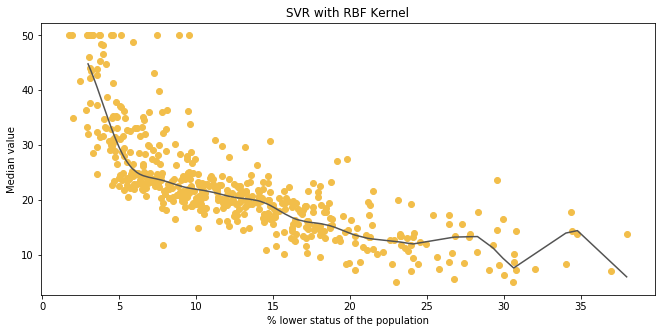

In [25]:
plt.figure(figsize=(11, 5))

plt.title("SVR with RBF Kernel")
plt.xlabel('% lower status of the population')
plt.ylabel('Median value')

plt.scatter(x = X, y = y, color=ORANGE)
values = np.column_stack((X_test,svr_rbf_predictions))
values = values[values[:,0].argsort()]
plt.plot(values[:,0], values[:,1], color=GRAY)
plt.show()